In [2]:
import requests
import json
import pandas as pd

# Download the data from the provided link
url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'
response = requests.get(url)

# Read the JSON data
data = response.json()

# Create lists to store the extracted data
pokemon_ids = []
pokemon_nums = []
pokemon_names = []
pokemon_imgs = []
pokemon_types = []
pokemon_heights = []
pokemon_weights = []
pokemon_candies = []
pokemon_candy_counts = []
pokemon_eggs = []
pokemon_spawn_chances = []
pokemon_avg_spawns = []
pokemon_spawn_times = []
pokemon_multipliers = []
pokemon_weaknesses = []
pokemon_next_evolutions = []
pokemon_prev_evolutions = []

# Extract the data from the JSON
for pokemon in data['pokemon']:
    pokemon_ids.append(pokemon['id'])
    pokemon_nums.append(pokemon['num'])
    pokemon_names.append(pokemon['name'])
    pokemon_imgs.append(pokemon['img'])
    pokemon_types.append(", ".join(pokemon['type']))
    pokemon_heights.append(pokemon['height'])
    pokemon_weights.append(pokemon['weight'])
    pokemon_candies.append(pokemon.get('candy'))
    pokemon_candy_counts.append(pokemon.get('candy_count'))
    pokemon_eggs.append(pokemon.get('egg'))
    pokemon_spawn_chances.append(pokemon.get('spawn_chance'))
    pokemon_avg_spawns.append(pokemon.get('avg_spawns'))
    pokemon_spawn_times.append(pokemon.get('spawn_time'))
    pokemon_weaknesses.append(", ".join(pokemon.get('weaknesses', [])))
    pokemon_next_evolutions.append(", ".join([evolution['num'] + ": " + evolution['name'] for evolution in pokemon.get('next_evolution', [])]))
    pokemon_prev_evolutions.append(", ".join([evolution['num'] + ": " + evolution['name'] for evolution in pokemon.get('prev_evolution', [])]))

# Create a DataFrame from the extracted data
df = pd.DataFrame({
    'ID': pokemon_ids,
    'Number': pokemon_nums,
    'Name': pokemon_names,
    'Image': pokemon_imgs,
    'Type': pokemon_types,
    'Height': pokemon_heights,
    'Weight': pokemon_weights,
    'Candy': pokemon_candies,
    'Candy Count': pokemon_candy_counts,
    'Egg': pokemon_eggs,
    'Spawn Chance': pokemon_spawn_chances,
    'Avg Spawns': pokemon_avg_spawns,
    'Spawn Time': pokemon_spawn_times,
    'Weaknesses': pokemon_weaknesses,
    'Next Evolutions': pokemon_next_evolutions,
    'Previous Evolutions': pokemon_prev_evolutions
})

# Save the DataFrame to Excel
output_file = 'pokemon_data.xlsx'
df.to_excel(output_file, index=False)
print("Data exported to", output_file)


Data exported to pokemon_data.xlsx


Pokemons with spawn rate less than 5%:
      ID  Number        Name  \
0      1       1   Bulbasaur   
1      2       2     Ivysaur   
2      3       3    Venusaur   
3      4       4  Charmander   
4      5       5  Charmeleon   
..   ...     ...         ...   
146  147     147     Dratini   
147  148     148   Dragonair   
148  149     149   Dragonite   
149  150     150      Mewtwo   
150  151     151         Mew   

                                                Image            Type  Height  \
0    http://www.serebii.net/pokemongo/pokemon/001.png   Grass, Poison  0.71 m   
1    http://www.serebii.net/pokemongo/pokemon/002.png   Grass, Poison  0.99 m   
2    http://www.serebii.net/pokemongo/pokemon/003.png   Grass, Poison  2.01 m   
3    http://www.serebii.net/pokemongo/pokemon/004.png            Fire  0.61 m   
4    http://www.serebii.net/pokemongo/pokemon/005.png            Fire  1.09 m   
..                                                ...             ...     ...   
146  http

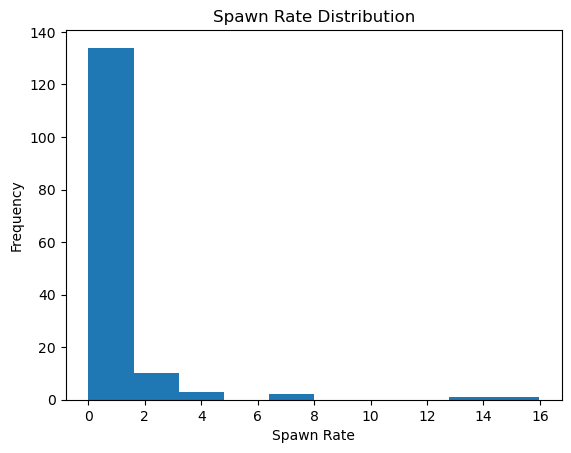

Pokemons with less than 4 weaknesses:
Empty DataFrame
Columns: [ID, Number, Name, Image, Type, Height, Weight, Candy, Candy Count, Egg, Spawn Chance, Avg Spawns, Spawn Time, Weaknesses, Next Evolutions, Previous Evolutions]
Index: []


TypeError: Invalid comparison between dtype=datetime64[ns] and Timedelta

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the JSON file into a DataFrame
df = pd.read_excel('pokemon_data.xlsx')

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = df[df['Spawn Chance'] < 5]
print("Pokemons with spawn rate less than 5%:")
print(spawn_rate_less_than_5)

# Plot the spawn rate distribution
plt.hist(df['Spawn Chance'], bins=10)
plt.xlabel('Spawn Rate')
plt.ylabel('Frequency')
plt.title('Spawn Rate Distribution')
plt.show()

# Get all Pokemons that have less than 4 weaknesses
less_than_4_weaknesses = df[df['Weaknesses'].apply(len) < 4]
print("Pokemons with less than 4 weaknesses:")
print(less_than_4_weaknesses)

# Get all Pokemons that have no multipliers at all
#no_multipliers = df[df['multipliers'].apply(len) == 0]
#print("Pokemons with no multipliers:")
#print(no_multipliers)

# Get all Pokemons that do not have more than 2 evolutions
#less_than_2_evolutions = df[df['Next Evolutions'].apply(lambda x: len(x) if x else 0) < 2]
#print("Pokemons with less than 2 evolutions:")
#print(less_than_2_evolutions)

# Get all Pokemons whose spawn time is less than 300 seconds
df['Spawn Time'] = pd.to_datetime(df['Spawn Time'], format='%M:%S')
spawn_time_less_than_300 = df[df['Spawn Time'] < pd.Timedelta(seconds=300)]
print("Pokemons with spawn time less than 300 seconds:")
print(spawn_time_less_than_300)

# Get all Pokemon who have more than two types of capabilities
more_than_2_types = df[df['Type'].apply(len) > 2]
print("Pokemons with more than 2 types of capabilities:")
print(more_than_2_types)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel('pokemon_data.xlsx')

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_threshold = 5
spawn_rate_less_than_5 = df[df['Spawn Chance'] < spawn_rate_threshold]

# Get all Pokemons that have less than 4 weaknesses
max_weaknesses = 4
less_than_4_weaknesses = df[df['Weaknesses'].str.len() < max_weaknesses]


# Get all Pokemons that do not have more than 2 evolutions
max_evolutions = 2
less_than_2_evolutions = df[df['Next Evolutions'].str.len() <= max_evolutions]

# Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_threshold = '05:00'
df['Spawn Time'] = pd.to_datetime(df['Spawn Time'], format='%M:%S')
less_than_300_seconds = df[df['Spawn Time'].dt.second < 300]

# Get all Pokemon who have more than two types of capabilities
more_than_2_types = df[df['Type'].str.len() > 2]

# Plotting the insights
plt.figure(figsize=(10, 6))

# Plot 1: Spawn Rate less than 5%
plt.subplot(231)
plt.hist(spawn_rate_less_than_5['Spawn Chance'], bins=10, edgecolor='black')
plt.xlabel('Spawn Rate')
plt.ylabel('Count')
plt.title('Pokemons with Spawn Rate < 5%')

# Plot 2: Less than 4 Weaknesses
plt.subplot(232)
plt.hist(less_than_4_weaknesses['Weaknesses'].str.len(), bins=range(8), edgecolor='black')
plt.xlabel('Number of Weaknesses')
plt.ylabel('Count')
plt.title('Pokemons with < 4 Weaknesses')


# Plot 4: Less than 2 Evolutions
plt.subplot(234)
plt.bar(['< 2 Evolutions', '>= 2 Evolutions'], [len(less_than_2_evolutions), len(df) - len(less_than_2_evolutions)])
plt.xlabel('Number of Evolutions')
plt.ylabel('Count')
plt.title('Pokemons with < 2 Evolutions')

# Plot 5: Spawn Time less than 300 seconds
plt.subplot(235)
plt.hist(df['Spawn Time'].dt.second, bins=range(0, 361, 60), edgecolor='black')
plt.xlabel('Spawn Time (seconds)')
plt.ylabel('Count')
plt.title('Pokemons with Spawn Time < 300 seconds')

# Plot 6: More than 2 Types
plt.subplot(236)
plt.bar(['> 2 Types', '<= 2 Types'], [len(more_than_2_types), len(df) - len(more_than_2_types)])
plt.xlabel('Number of Types')
plt.ylabel('Count')
plt.title('Pokemons'


SyntaxError: unterminated string literal (detected at line 65) (2014710791.py, line 65)